In [1]:
from google.colab import files


uploaded = files.upload()

Saving balanced_skin_hydration_dataset.csv to balanced_skin_hydration_dataset.csv


# Hydration Prediction using Machine Learning

This notebook demonstrates a mini prototype for predicting hydration status (or confidence level) using supervised learning models like **Random Forest** and **XGBoost**.  
It includes:
- Data preprocessing
- Model training
- Model comparison
- Confidence-based hydration estimation


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


# Load and Inspect Dataset

In [3]:
df = pd.read_csv("balanced_skin_hydration_dataset.csv")
df.head()


,Electrical_Capacitance,Impedance,Skin_Temperature,Skin_Conductance,Skin_Reflectance,Color_Metrics,TEWL,Ambient_Humidity,Ambient_Temperature,Time_of_Day,Target
0,64.636778,1232.361706,31.581387,1.075891,0.298884,76.217193,10.703732,65.666086,33.479584,1,1
1,20.863609,842.682112,32.830364,0.839762,0.451885,63.045053,15.761893,77.109273,32.046135,2,0
2,66.792533,695.129360,31.043204,1.285461,0.593685,92.414819,6.450446,77.365345,20.988382,3,1
3,61.423690,1310.017872,28.501517,2.439853,0.401341,118.895553,11.167042,40.560413,33.162339,3,0
4,73.712410,1021.357286,33.630857,0.804097,0.349651,137.365262,7.767952,60.161107,23.322403,2,1


# Preprocessing

In [4]:
X = df.drop("Target", axis=1)
y = df["Target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Training & Evaluation

In [6]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)


# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

Random Forest
1.0
1.0
XGB
1.0
1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:39:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Model Comparison

In [7]:
print(f"Random Forest - Accuracy: {rf_acc:.4f}, F1: {rf_f1:.4f}")
print(f"XGBoost       - Accuracy: {xgb_acc:.4f}, F1: {xgb_f1:.4f}")

best_model = rf_model if rf_f1 >= xgb_f1 else xgb_model
best_model_name = "Random Forest" if rf_f1 >= xgb_f1 else "XGBoost"


Random Forest - Accuracy: 1.0000, F1: 1.0000
XGBoost       - Accuracy: 1.0000, F1: 1.0000


# Feature Importance Plot

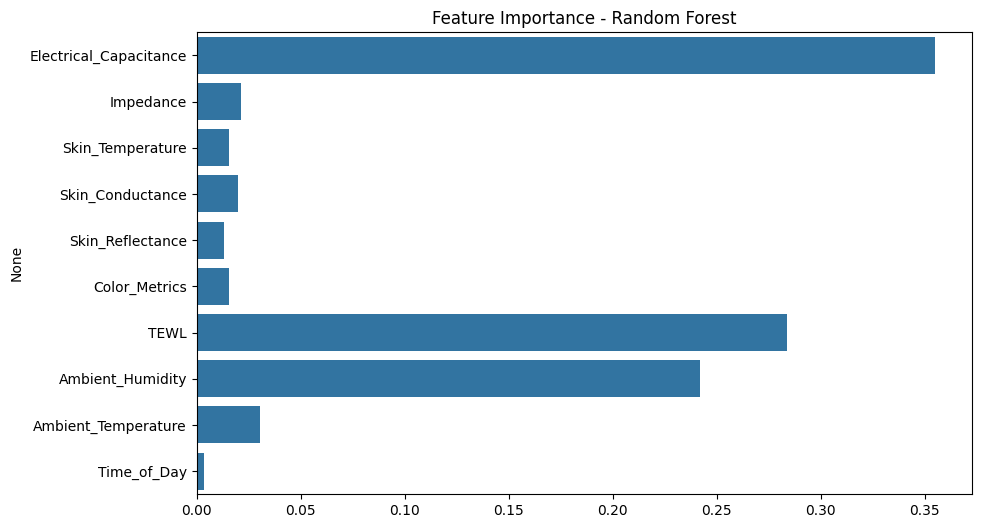

In [8]:
importances = best_model.feature_importances_
feature_names = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title(f"Feature Importance - {best_model_name}")
plt.show()


# Train vs Test Target Distribution

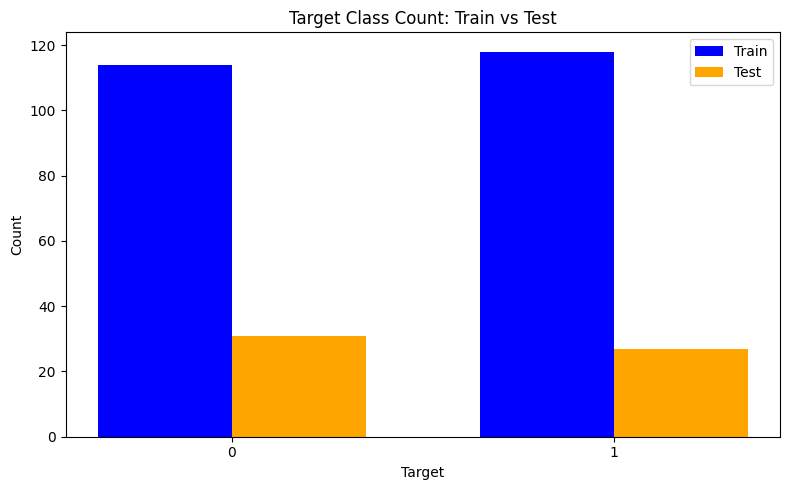

In [9]:
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

bar_width = 0.35
index = np.arange(len(train_counts))

plt.figure(figsize=(8, 5))
plt.bar(index, train_counts, bar_width, label='Train', color='blue')
plt.bar(index + bar_width, test_counts, bar_width, label='Test', color='orange')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Class Count: Train vs Test')
plt.xticks(index + bar_width / 2, train_counts.index)
plt.legend()
plt.tight_layout()
plt.show()


# Manual Sample Prediction

In [12]:
### Manual Input Prediction Example
# Create a manual sample (make sure to match the number and order of features)
man_sample = pd.DataFrame([{
    feature_names[0]: 0.65,
    feature_names[1]: 0.45,
    feature_names[2]: 0.55,
    feature_names[3]: 0.50,
    feature_names[4]: 0.75,
    feature_names[5]: 0.62,
    feature_names[6]: 0.48,
    feature_names[7]: 0.33,
    feature_names[8]: 0.80,
    feature_names[9]: 0.70
}])

man_sample_scaled = scaler.transform(man_sample)

prediction = best_model.predict(man_sample_scaled)[0]

status = "Hydrated" if prediction == 1 else "Not Hydrated"
print(f"\nManual Sample Prediction: {status} (Class = {prediction})")




Manual Sample Prediction: Not Hydrated (Class = 0)
